# Лабораторная работа 2.1 Проведение полного цикла EDA и создание аналитического отчета с гипотезами.

**Цель работы.** Провести полный цикл разведочного анализа данных (EDA) на реальном наборе данных, научиться формулировать и проверять гипотезы с помощью библиотеки Pandas, а также создавать визуализации для подкрепления своих выводов. В результате выполнения работы будет создан полноценный аналитический отчет.

## Теоретическая часть. Основные этапы EDA для бизнес-аналитиков

Разведочный анализ данных (Exploratory Data Analysis, EDA) — это не просто набор технических действий, а исследовательский процесс, который позволяет аналитику "познакомиться" с данными, понять их структуру, выявить аномалии и сформулировать первые гипотезы. Для бизнес-аналитика этот процесс является фундаментом для принятия обоснованных решений.

### Этап 1. Определение бизнес-задачи и понимание данных
Любой анализ начинается с вопроса. Прежде чем писать код, бизнес-аналитик должен четко понимать:
- **Какую бизнес-проблему мы решаем?** (Например, «Почему у нас падает лояльность клиентов?» или «Какие факторы влияют на риск заболевания?»).
- **Какие данные у нас есть?** Необходимо изучить описание каждого признака (поля). Что означает `ap_hi`? В каких единицах измеряется `age`? Что значат категории `1`, `2`, `3` в `cholesterol`?
- **Какие гипотезы можно проверить?** На основе бизнес-контекста можно предположить, например: «Люди старшего возраста чаще болеют» или «Курение напрямую связано с уровнем холестерина».

### Этап 2. Загрузка и первичный осмотр
Это первый практический шаг. Основные инструменты:
- `pd.read_csv()` (или другие функции чтения): Загрузка данных в DataFrame.
- `.head()`, `.tail()`: Посмотреть на первые и последние строки, чтобы убедиться, что данные загрузились корректно.
- `.info()`: Оценить общий объем данных (количество строк), типы данных в каждом столбце и, что самое важное, **выявить наличие пропущенных значений**.
- `.describe()`: Получить базовые статистические показатели (среднее, медиана, стандартное отклонение, мин/макс) для всех числовых признаков. Это помогает быстро заметить аномалии (например, отрицательный возраст или нереалистично высокое давление).

### Этап 3. Очистка и подготовка данных (Препроцессинг)
Самый трудоемкий, но и самый важный этап. "Мусор на входе — мусор на выходе".
- **Обработка пропусков:** Удаление или заполнение (импутация) пропущенных значений.
- **Удаление выбросов и аномалий:** Фильтрация данных для удаления очевидных ошибок (например, давление 1400/80 или вес 20 кг при росте 180 см).
- **Преобразование типов данных:** Приведение столбцов к нужным форматам (например, перевод возраста из дней в годы, преобразование дат из строк в тип `datetime`).
- **Feature Engineering:** Создание новых, более информативных признаков из существующих. Например, расчет Индекса Массы Тела (ИМТ) из роста и веса.

### Этап 4. Одномерный анализ (Univariate Analysis)
Анализ каждого признака в отдельности для понимания его распределения.
- **Для категориальных признаков** (`gender`, `cholesterol`): `value_counts()` для подсчета уникальных значений и `countplot` (Seaborn) для визуализации.
- **Для числовых признаков** (`age_years`, `weight`): Гистограммы (`.hist()`) для оценки формы распределения (нормальное, скошенное) и "ящики с усами" (`boxplot`) для визуализации медианы, квартилей и выбросов.

### Этап 5. Двумерный и многомерный анализ (Bivariate/Multivariate Analysis)
На этом этапе мы ищем взаимосвязи между переменными и проверяем гипотезы.
- **Числовой vs Числовой:** Диаграммы рассеяния (`scatterplot`) для поиска линейных зависимостей и **корреляционная матрица** (`.corr()` с `heatmap`) для количественной оценки связей.
- **Категориальный vs Числовой:** Группировка (`groupby`) с агрегирующими функциями (`mean`, `median`) и `boxplot` или `barplot` для визуального сравнения.
- **Категориальный vs Категориальный:** Таблицы сопряженности (`pd.crosstab`) и `countplot` с параметром `hue` для анализа распределений.

### Этап 6. Формулирование выводов и создание отчета
Конечный продукт работы бизнес-аналитика — это не код, а **выводы**, которые помогают бизнесу. На этом этапе необходимо:
- **Подтвердить или опровергнуть** первоначальные гипотезы.
- **Сформулировать новые инсайты**, обнаруженные в процессе анализа.
- **Визуализировать** ключевые находки с помощью понятных графиков.
- **Составить краткий отчет**, понятный даже нетехническому специалисту (например, менеджеру или врачу).

## Описание данных

Мы будем работать с набором данных `cardio_train.csv`, который содержит информацию о пациентах, их медицинских показателях и наличии сердечно-сосудистых заболеваний (ССЗ).

**Поля данных:**

| Признак | Описание | Тип данных |
| :--- | :--- | :--- |
| `id` | Уникальный идентификатор | int |
| `age` | Возраст в днях | int |
| `gender` | Пол (1 - женщины, 2 - мужчины) | categorical |
| `height` | Рост в см | int |
| `weight` | Вес в кг | float |
| `ap_hi` | Систолическое (верхнее) артериальное давление | int |
| `ap_lo` | Диастолическое (нижнее) артериальное давление | int |
| `cholesterol` | Уровень холестерина (1: норма, 2: выше нормы, 3: значительно выше нормы) | categorical |
| `gluc` | Уровень глюкозы (1: норма, 2: выше нормы, 3: значительно выше нормы) | categorical |
| `smoke` | Курение (0: нет, 1: да) | binary |
| `alco` | Употребление алкоголя (0: нет, 1: да) | binary |
| `active` | Физическая активность (0: нет, 1: да) | binary |
| `cardio` | **Целевая переменная:** наличие ССЗ (0: нет, 1: да) | binary |

## Часть 1. Загрузка и первичный осмотр данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки для лучшего отображения графиков
sns.set(style="whitegrid")

### Задача 1.1 Загрузка данных
Загрузите данные из файла `cardio_train.csv`. Обратите внимание, что разделителем в файле является точка с запятой `;`.

In [2]:
# Укажите путь к вашему файлу. Если он лежит рядом с ноутбуком, достаточно имени файла.
file_path = 'cardio_train.csv'
df = pd.read_csv(file_path, sep=';')

### Задача 1.2 Первичный осмотр
Выведите первые 5 строк, основную информацию о DataFrame и описательную статистику.

In [3]:
print("Первые 5 строк данных:")
display(df.head())

Первые 5 строк данных:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
print("\nИнформация о DataFrame:")
df.info()


Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
print("\nОписательная статистика для числовых признаков:")
display(df.describe().T)


Описательная статистика для числовых признаков:


,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


## Часть 2. Предобработка и очистка данных

На этом этапе мы исправим ошибки в данных и приведем их к удобному для анализа виду.

### Задача 2.1 Удаление ненужного столбца
Удалим столбец `id`, так как он не несет аналитической ценности.

In [6]:
df = df.drop('id', axis=1)

### Задача 2.2 Преобразование возраста
Преобразуем возраст из дней в полные годы.

In [7]:
df['age_years'] = (df['age'] / 365).astype(int)
df = df.drop('age', axis=1) # Удаляем старый столбец

print("Распределение возраста в годах:")
display(df['age_years'].describe())

Распределение возраста в годах:


,age_years
count,70000.000000
mean,52.840671
std,6.766774
min,29.000000
25%,48.000000
50%,53.000000
75%,58.000000
max,64.000000


### Задача 2.3 Очистка данных об артериальном давлении
Давление не может быть отрицательным, а диастолическое (нижнее) не может быть выше систолического (верхнего). Также уберем очевидные выбросы (например, давление 16020 — это опечатка). Отфильтруем данные, оставив только реалистичные значения.

**Логика фильтрации:**
- `ap_hi` (верхнее) должно быть от 60 до 250.
- `ap_lo` (нижнее) должно быть от 40 до 150.
- `ap_hi` должно быть больше `ap_lo`.

In [8]:
initial_rows = df.shape[0]

df_cleaned = df[
    (df['ap_hi'] >= 60) & (df['ap_hi'] <= 250) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 150) &
    (df['ap_hi'] > df['ap_lo'])
].copy() # Используем .copy(), чтобы избежать SettingWithCopyWarning

cleaned_rows = df_cleaned.shape[0]
print(f"Исходное количество записей: {initial_rows}")
print(f"Количество записей после очистки: {cleaned_rows}")
print(f"Удалено {initial_rows - cleaned_rows} записей с некорректным давлением.")

Исходное количество записей: 70000
Количество записей после очистки: 68667
Удалено 1333 записей с некорректным давлением.


### Задача 2.4 Создание нового признака (Feature Engineering)
Создадим Индекс Массы Тела (ИМТ), который является важным показателем здоровья. Формула: `вес (кг) / (рост (м))^2`.

In [9]:
df_cleaned['bmi'] = df_cleaned['weight'] / (df_cleaned['height'] / 100)**2
display(df_cleaned[['height', 'weight', 'bmi']].head())

,height,weight,bmi
0,168,62.0,21.967120
1,156,85.0,34.927679
2,165,64.0,23.507805
3,169,82.0,28.710479
4,156,56.0,23.011177


## Часть 3. Одномерный анализ (Univariate Analysis)
Изучим распределение каждого признака по отдельности.

### Задача 3.1 Анализ целевой переменной `cardio`
Посмотрим, сбалансированы ли классы (количество здоровых и больных).

cardio
0    0.505308
1    0.494692
Name: proportion, dtype: float64


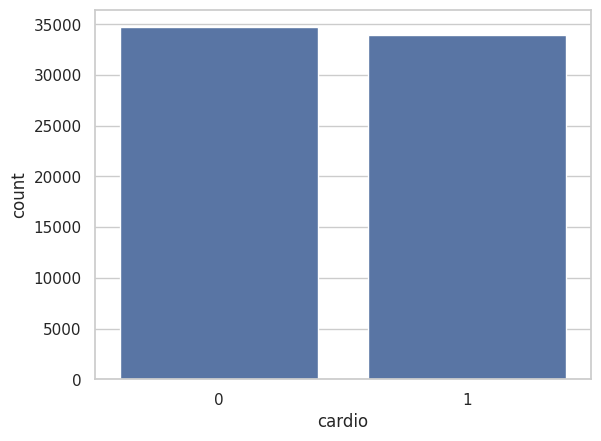

In [10]:
print(df_cleaned['cardio'].value_counts(normalize=True))
sns.countplot(x='cardio', data=df_cleaned);

**Вывод:** Классы почти идеально сбалансированы (примерно 50/50), что хорошо для дальнейшего моделирования.

### Задача 3.2 Анализ категориальных признаков
Изучим распределения для `gender`, `cholesterol`, `smoke` и других.

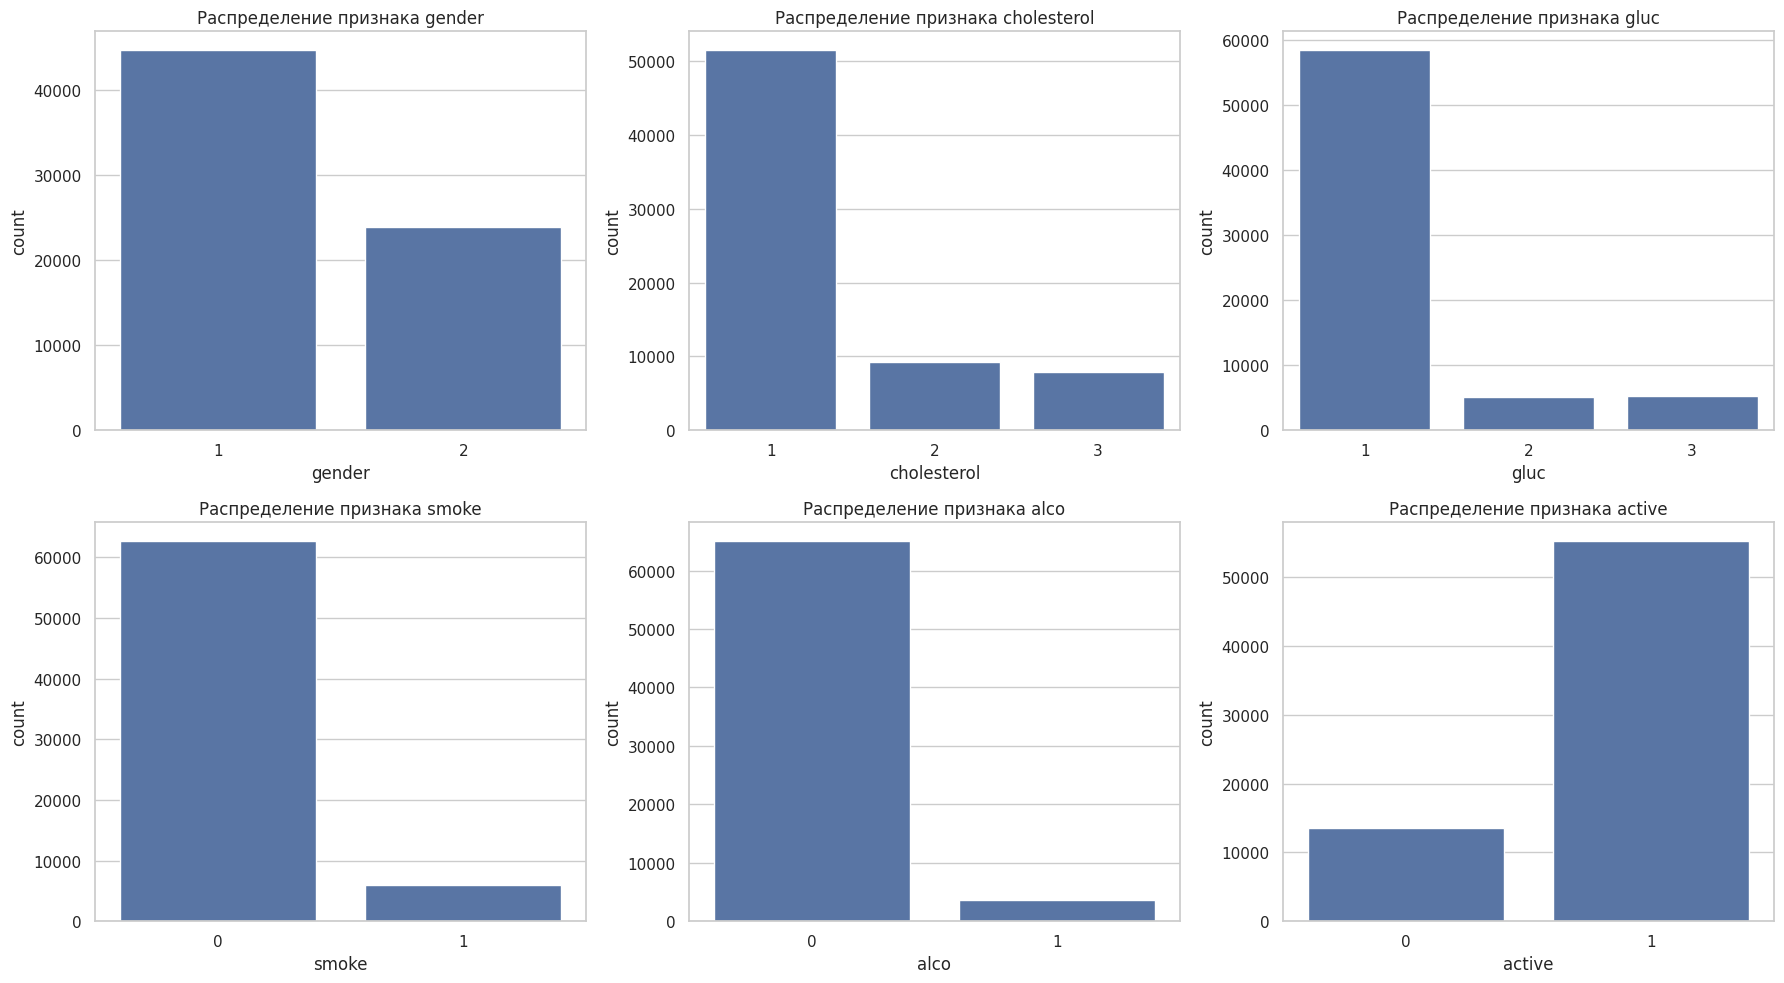

In [11]:
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=df_cleaned, ax=axes[row, col])
    axes[row, col].set_title(f'Распределение признака {feature}')

plt.tight_layout()

### Задача 3.3 Анализ числовых признаков
Построим гистограммы для `age_years`, `height`, `weight`, `ap_hi`, `ap_lo`, `bmi`.

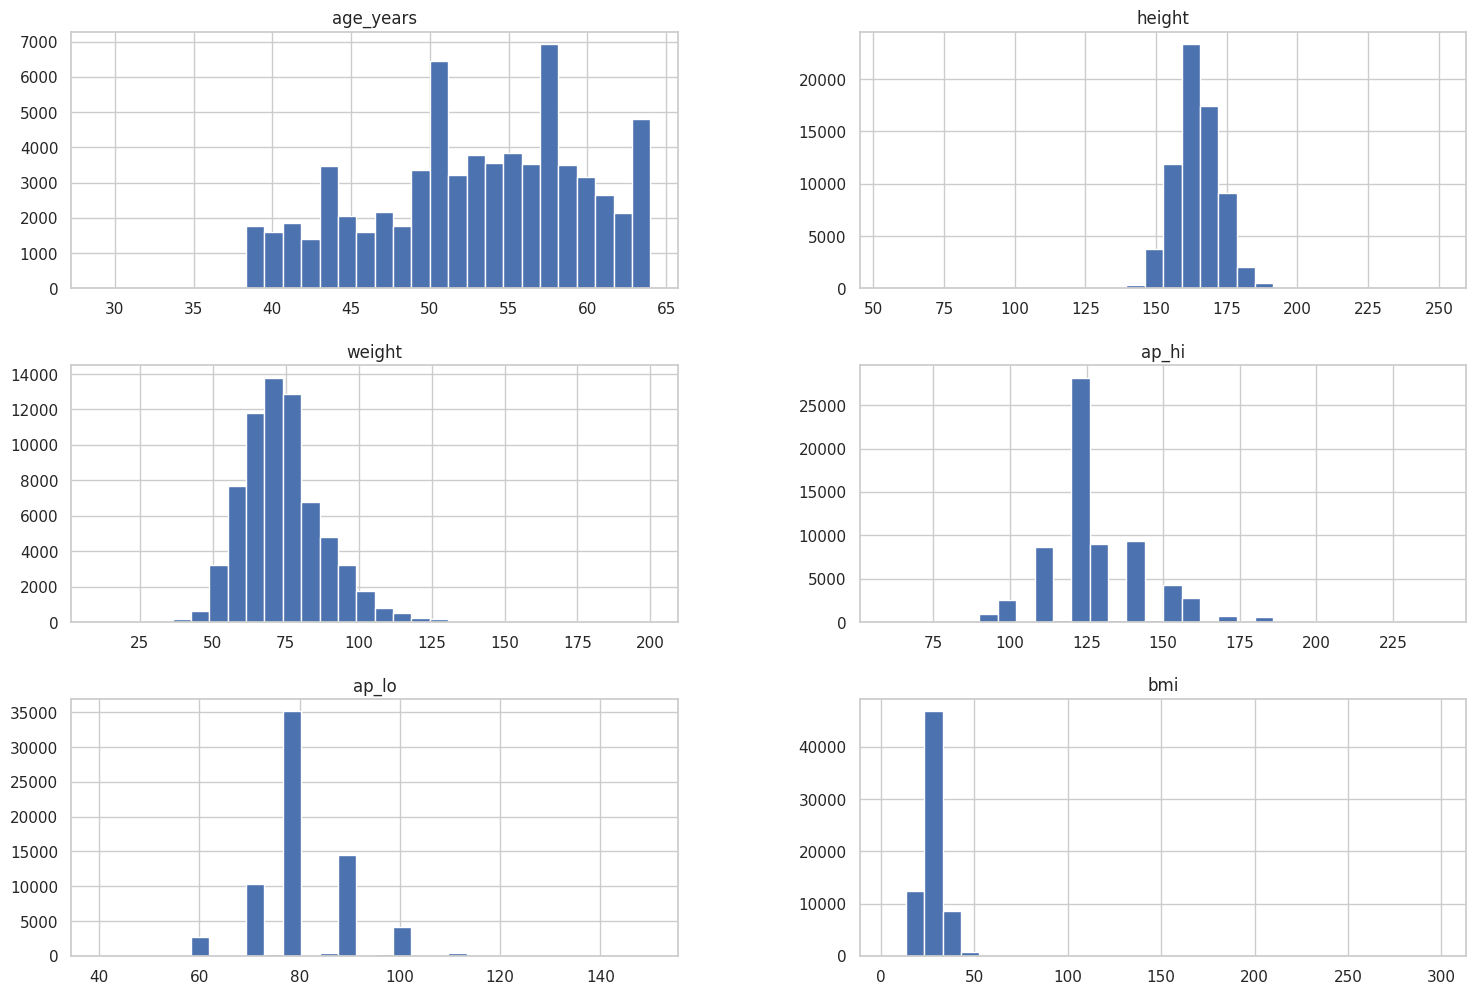

In [12]:
numerical_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
df_cleaned[numerical_features].hist(bins=30, figsize=(18, 12));

## Часть 4. Двумерный и многомерный анализ
На этом этапе мы ищем взаимосвязи между признаками и формулируем гипотезы.

### Гипотеза 1 Уровень холестерина влияет на наличие ССЗ.
Сравним распределение уровней холестерина для здоровых и больных пациентов.

cardio,0,1
cholesterol,,
1,0.564604,0.435396
2,0.403656,0.596344
3,0.237387,0.762613


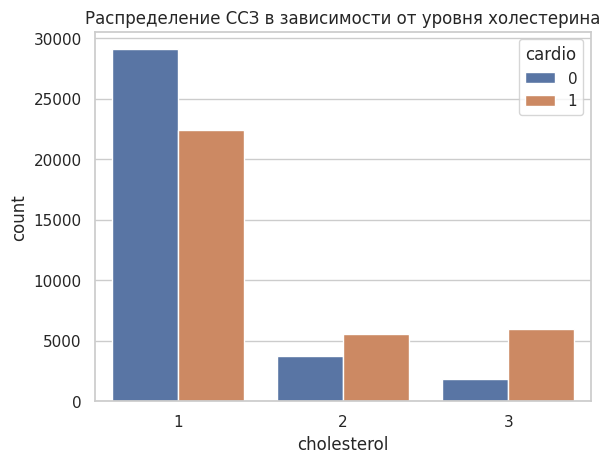

In [13]:
sns.countplot(x='cholesterol', hue='cardio', data=df_cleaned);
plt.title('Распределение ССЗ в зависимости от уровня холестерина');

# Таблица сопряженности для точных цифр
display(pd.crosstab(df_cleaned['cholesterol'], df_cleaned['cardio'], normalize='index'))

**Вывод:** Гипотеза подтверждается. С ростом уровня холестерина (от 1 до 3) доля пациентов с ССЗ заметно увеличивается (с 40% до 76%).

### Гипотеза 2 С возрастом риск ССЗ увеличивается.
Посмотрим на распределение возраста для двух групп: с ССЗ и без.

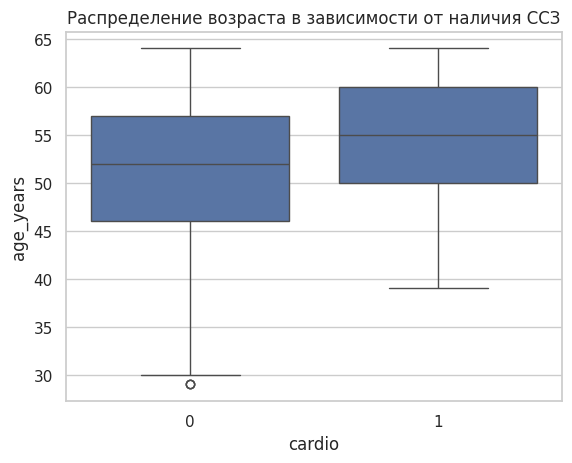

In [14]:
sns.boxplot(x='cardio', y='age_years', data=df_cleaned);
plt.title('Распределение возраста в зависимости от наличия ССЗ');

**Вывод:** Гипотеза подтверждается. Медианный возраст пациентов с ССЗ (около 56 лет) значительно выше, чем у здоровых (около 52 лет).

### Гипотеза 3 Мужчины более склонны к курению и употреблению алкоголя.
Сравним доли курящих и употребляющих алкоголь среди мужчин и женщин.

,smoke,alco
Женщины,0.017752,0.025197
Мужчины,0.219182,0.105978


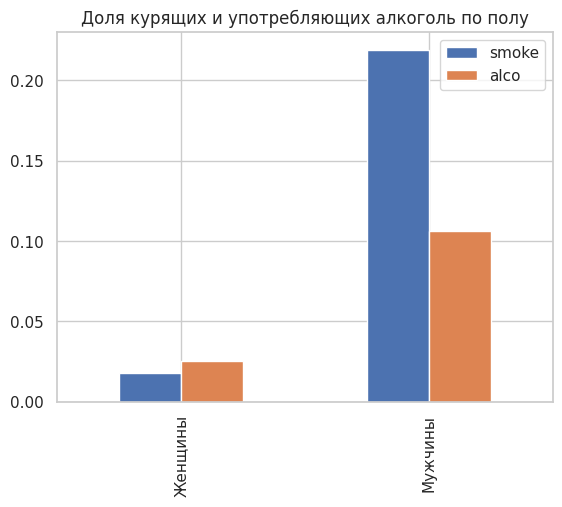

In [15]:
df_gender_habits = df_cleaned.groupby('gender')[['smoke', 'alco']].mean()
df_gender_habits.index = ['Женщины', 'Мужчины'] # Переименуем для наглядности
display(df_gender_habits)

df_gender_habits.plot(kind='bar', title='Доля курящих и употребляющих алкоголь по полу');

**Вывод:** Гипотеза подтверждается. Доля курящих мужчин (21.7%) и употребляющих алкоголь (10.2%) значительно выше, чем у женщин (1.7% и 1.8% соответственно).

### Задача 4.1 Корреляционная матрица
Найдем числовые взаимосвязи между всеми количественными признаками.

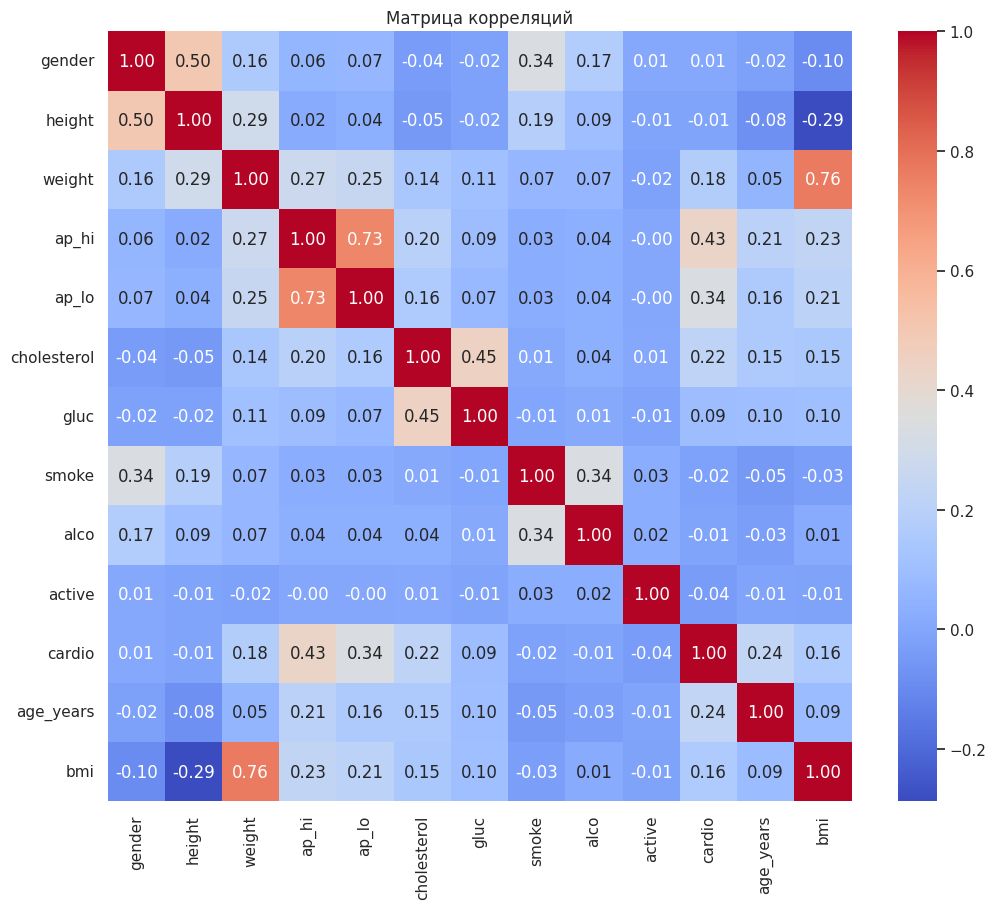

In [16]:
plt.figure(figsize=(12, 10))
corr_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm');
plt.title('Матрица корреляций');

**Выводы по матрице:**
- Наиболее сильная положительная корреляция с целевой переменной `cardio` наблюдается у признаков: `age_years` (0.24), `cholesterol` (0.22), `weight` (0.17), `ap_hi` (0.42) и `ap_lo` (0.34).
- Рост (`height`) и физическая активность (`active`) имеют слабую отрицательную корреляцию, что логично (более высокие и активные люди в среднем здоровее).
- Систолическое и диастолическое давление сильно скоррелированы между собой (0.73).

## Часть 5. Индивидуальные задания для самостоятельной работы

**Инструкция:**
1.  Выберите задание, соответствующее вашему варианту.
2.  В ячейке под вашим вариантом напишите код для решения всех 5 пунктов.
3.  Используйте очищенный DataFrame `df_cleaned`.
4.  Результат выполнения каждого пункта выведите на экран (например, `display(df)` или `print(result)`).

### Вариант 1
1.  Определите, у какого пола (`gender`) в среднем выше Индекс Массы Тела (`bmi`).
2.  Найдите 5 самых высоких пациентов с диагностированным ССЗ (`cardio` = 1).
3.  Каков процент курящих (`smoke`) среди людей с уровнем холестерина значительно выше нормы (`cholesterol` = 3)?
4.  Создайте новый признак `bp_category` (категория давления) на основе `ap_hi`: 'normal' (<120), 'elevated' (120-129), 'high' (>=130). Посчитайте количество пациентов в каждой категории.
5.  Сравните средний возраст физически активных (`active` = 1) и неактивных (`active` = 0) людей.

In [ ]:
# Ваш код для варианта 1

### Вариант 2
1.  Определите, у какой группы по уровню глюкозы (`gluc`) в среднем самое высокое систолическое давление (`ap_hi`).
2.  Найдите 5 самых молодых пациентов, не употребляющих алкоголь (`alco` = 0).
3.  Каков процент людей с ССЗ (`cardio` = 1) среди некурящих (`smoke` = 0)?
4.  Создайте новый признак `age_group`: 'young' (<45), 'middle' (45-59), 'senior' (>=60). Посчитайте количество пациентов в каждой группе.
5.  Сравните средний вес курящих (`smoke` = 1) и некурящих (`smoke` = 0) людей.

In [ ]:
# Ваш код для варианта 2

### Вариант 3
1.  Определите, у какой группы по уровню холестерина (`cholesterol`) в среднем самый высокий возраст (`age_years`).
2.  Найдите 5 пациентов с самым низким диастолическим давлением (`ap_lo`), у которых нет ССЗ (`cardio` = 0).
3.  Каков процент физически активных людей (`active` = 1) среди мужчин (`gender` = 2)?
4.  Создайте новый признак `bmi_category`: 'underweight' (<18.5), 'normal' (18.5-25), 'overweight' (>=25). Посчитайте количество пациентов в каждой категории.
5.  Сравните среднее систолическое давление (`ap_hi`) у употребляющих алкоголь (`alco` = 1) и не употребляющих (`alco` = 0).

In [ ]:
# Ваш код для варианта 3

### Вариант 4
1. Определите, у курящих (`smoke` = 1) или некурящих (`smoke` = 0) в среднем выше уровень холестерина (числовое значение).
2. Найдите 5 самых тяжелых (по `weight`) пациентов старше 60 лет.
3. Каков процент женщин (`gender` = 1) среди пациентов с ССЗ (`cardio` = 1)?
4. Создайте новый бинарный признак `is_overweight`, который равен 1, если `bmi` >= 25, и 0 в противном случае. Посчитайте, сколько пациентов имеют избыточный вес.
5. Сравните медианный рост (`height`) для групп с разным уровнем глюкозы (`gluc`).

In [ ]:
# Ваш код для варианта 4

### Вариант 5
1. Определите, кто в среднем старше: те, кто употребляет алкоголь (`alco` = 1), или те, кто не употребляет.
2. Найдите 5 пациентов с самым высоким систолическим давлением (`ap_hi`).
3. Каков процент людей с нормальным уровнем глюкозы (`gluc` = 1) среди пациентов без ССЗ (`cardio` = 0)?
4. Создайте новый признак `pulse_pressure` (пульсовое давление) как разницу между `ap_hi` и `ap_lo`. Выведите описательную статистику для этого признака.
5. Сравните средний ИМТ (`bmi`) для курящих и некурящих мужчин.

In [ ]:
# Ваш код для варианта 5

### Вариант 6
1.  Определите, какая доля пациентов в датасете является физически активной (`active` = 1).
2.  Найдите 5 самых пожилых пациентов с нормальным уровнем холестерина (`cholesterol` = 1).
3.  Каков средний рост (`height`) для людей с ССЗ и без него?
4.  Создайте признак `is_smoker_and_drinker` (1, если пациент и курит, и пьет, иначе 0). Сколько таких пациентов?
5.  Сравните медианное систолическое давление (`ap_hi`) у мужчин и женщин.

In [ ]:
# Ваш код для варианта 6

### Вариант 7
1.  Определите, кто в среднем имеет больший вес: женщины (`gender`=1) или мужчины (`gender`=2).
2.  Найдите 5 пациентов с самым низким ИМТ (`bmi`), которые при этом курят.
3.  Какова доля людей с ССЗ (`cardio` = 1) среди тех, кто употребляет алкоголь (`alco` = 1)?
4.  Создайте признак `chol_gluc_sum` как сумму числовых значений `cholesterol` и `gluc`. Сравните среднее значение этого признака у больных и здоровых.
5.  Посчитайте, сколько пациентов имеют рост ровно 165 см.

In [ ]:
# Ваш код для варианта 7

### Вариант 8
1.  Сравните среднее диастолическое давление (`ap_lo`) у курящих и некурящих.
2.  Найдите 5 самых молодых женщин с высоким уровнем холестерина (`cholesterol` > 1).
3.  Каков процент физически активных (`active` = 1) людей среди пациентов с ССЗ?
4.  Создайте признак `height_m` (рост в метрах). Выведите первые 5 строк с этим признаком.
5.  Определите, у какой возрастной группы (`age_years`, сгруппированной по десятилетиям) самый высокий средний ИМТ.

In [ ]:
# Ваш код для варианта 8

### Вариант 9
1.  Сравните максимальный вес (`weight`) у мужчин и женщин.
2.  Найдите 5 пациентов с самым низким систолическим давлением (`ap_hi`), которые употребляют алкоголь.
3.  Какова доля людей с ССЗ среди тех, у кого уровень глюкозы выше нормы (`gluc` > 1)?
4.  Создайте признак `is_man_smoker` (1, если мужчина и курит, иначе 0). Сколько таких пациентов?
5.  Определите, как отличается средний возраст у пациентов с тремя разными уровнями холестерина.

In [ ]:
# Ваш код для варианта 9

### Вариант 10
1.  Определите, у кого в среднем выше рост: у курящих или некурящих?
2.  Найдите 5 самых пожилых пациентов, у которых диастолическое давление (`ap_lo`) выше 90.
3.  Какова доля физически неактивных пациентов (`active`=0) среди людей без ССЗ (`cardio`=0)?
4.  Создайте признак `pressure_category` ('Optimal' если ap_hi < 120, 'Normal' 120-139, 'High' >= 140). Посчитайте, сколько пациентов в каждой категории.
5.  Сравните медианный ИМТ (`bmi`) у женщин с ССЗ и без ССЗ.

In [17]:
# Ваш код для варианта 10
# Войт Иван Иванович

# Ваш код для варианта 10

# Пункт 1: Определите, у кого в среднем выше рост: у курящих или некурящих?
print("=" * 60)
print("ПУНКТ 1: Сравнение среднего роста у курящих и некурящих")
print("=" * 60)
mean_height_smoke = df_cleaned.groupby('smoke')['height'].mean()
print(f"Средний рост у некурящих (smoke=0): {mean_height_smoke[0]:.2f} см")
print(f"Средний рост у курящих (smoke=1): {mean_height_smoke[1]:.2f} см")
if mean_height_smoke[0] > mean_height_smoke[1]:
    print(f"Вывод: У некурящих средний рост выше на {mean_height_smoke[0] - mean_height_smoke[1]:.2f} см")
else:
    print(f"Вывод: У курящих средний рост выше на {mean_height_smoke[1] - mean_height_smoke[0]:.2f} см")
display(mean_height_smoke)

# Пункт 2: Найдите 5 самых пожилых пациентов, у которых диастолическое давление (ap_lo) выше 90
print("\n" + "=" * 60)
print("ПУНКТ 2: 5 самых пожилых пациентов с ap_lo > 90")
print("=" * 60)
oldest_high_ap_lo = df_cleaned[df_cleaned['ap_lo'] > 90].nlargest(5, 'age_years')
print(f"Найдено {len(df_cleaned[df_cleaned['ap_lo'] > 90])} пациентов с ap_lo > 90")
print("Топ-5 самых пожилых:")
display(oldest_high_ap_lo[['age_years', 'ap_lo', 'ap_hi', 'gender', 'cardio']])

# Пункт 3: Какова доля физически неактивных пациентов (active=0) среди людей без ССЗ (cardio=0)?
print("\n" + "=" * 60)
print("ПУНКТ 3: Доля физически неактивных среди людей без ССЗ")
print("=" * 60)
no_cardio = df_cleaned[df_cleaned['cardio'] == 0]
inactive_no_cardio = no_cardio[no_cardio['active'] == 0]
proportion = len(inactive_no_cardio) / len(no_cardio) * 100
print(f"Всего пациентов без ССЗ: {len(no_cardio)}")
print(f"Физически неактивных без ССЗ: {len(inactive_no_cardio)}")
print(f"Доля физически неактивных среди людей без ССЗ: {proportion:.2f}%")
print(f"Доля в виде дроби: {len(inactive_no_cardio)}/{len(no_cardio)} = {proportion/100:.4f}")

# Пункт 4: Создайте признак pressure_category ('Optimal' если ap_hi < 120, 'Normal' 120-139, 'High' >= 140)
print("\n" + "=" * 60)
print("ПУНКТ 4: Создание признака pressure_category")
print("=" * 60)
def categorize_pressure(ap_hi):
    if ap_hi < 120:
        return 'Optimal'
    elif ap_hi < 140:
        return 'Normal'
    else:
        return 'High'

df_cleaned['pressure_category'] = df_cleaned['ap_hi'].apply(categorize_pressure)
pressure_counts = df_cleaned['pressure_category'].value_counts()
print("Количество пациентов в каждой категории давления:")
display(pressure_counts)
print("\nПроцентное распределение:")
display(df_cleaned['pressure_category'].value_counts(normalize=True) * 100)

# Пункт 5: Сравните медианный ИМТ (bmi) у женщин с ССЗ и без ССЗ
print("\n" + "=" * 60)
print("ПУНКТ 5: Сравнение медианного ИМТ у женщин с ССЗ и без ССЗ")
print("=" * 60)
women = df_cleaned[df_cleaned['gender'] == 1]  # gender=1 это женщины
median_bmi_women_no_cardio = women[women['cardio'] == 0]['bmi'].median()
median_bmi_women_cardio = women[women['cardio'] == 1]['bmi'].median()
print(f"Медианный ИМТ у женщин без ССЗ: {median_bmi_women_no_cardio:.2f}")
print(f"Медианный ИМТ у женщин с ССЗ: {median_bmi_women_cardio:.2f}")
print(f"Разница: {abs(median_bmi_women_cardio - median_bmi_women_no_cardio):.2f}")
if median_bmi_women_cardio > median_bmi_women_no_cardio:
    print(f"Вывод: У женщин с ССЗ медианный ИМТ выше на {median_bmi_women_cardio - median_bmi_women_no_cardio:.2f}")
else:
    print(f"Вывод: У женщин без ССЗ медианный ИМТ выше на {median_bmi_women_no_cardio - median_bmi_women_cardio:.2f}")

# Дополнительная визуализация для пункта 5
comparison_df = pd.DataFrame({
    'Без ССЗ': [median_bmi_women_no_cardio],
    'С ССЗ': [median_bmi_women_cardio]
})
print("\nСводная таблица:")
display(comparison_df)

ПУНКТ 1: Сравнение среднего роста у курящих и некурящих
Средний рост у некурящих (smoke=0): 163.88 см
Средний рост у курящих (smoke=1): 169.32 см
Вывод: У курящих средний рост выше на 5.44 см


,height
smoke,
0,163.882237
1,169.322298



ПУНКТ 2: 5 самых пожилых пациентов с ap_lo > 90
Найдено 5043 пациентов с ap_lo > 90
Топ-5 самых пожилых:


,age_years,ap_lo,ap_hi,gender,cardio
230,64,100,180,2,1
724,64,100,140,1,1
1001,64,100,160,1,1
1136,64,100,140,1,1
1646,64,100,150,1,1



ПУНКТ 3: Доля физически неактивных среди людей без ССЗ
Всего пациентов без ССЗ: 34698
Физически неактивных без ССЗ: 6313
Доля физически неактивных среди людей без ССЗ: 18.19%
Доля в виде дроби: 6313/34698 = 0.1819

ПУНКТ 4: Создание признака pressure_category
Количество пациентов в каждой категории давления:


,count
pressure_category,
Normal,37465
High,18471
Optimal,12731



Процентное распределение:


,proportion
pressure_category,
Normal,54.560415
High,26.899384
Optimal,18.540201



ПУНКТ 5: Сравнение медианного ИМТ у женщин с ССЗ и без ССЗ
Медианный ИМТ у женщин без ССЗ: 25.71
Медианный ИМТ у женщин с ССЗ: 27.89
Разница: 2.17
Вывод: У женщин с ССЗ медианный ИМТ выше на 2.17

Сводная таблица:


,Без ССЗ,С ССЗ
0,25.711662,27.885187


### Вариант 11
1. Сравните минимальный возраст (`age_years`) для мужчин и женщин.
2. Найдите 5 пациентов с самым высоким ИМТ, у которых нормальный уровень холестерина (`cholesterol` = 1).
3. Каков процент людей, употребляющих алкоголь, среди курящих?
4. Создайте признак `is_senior` (1, если `age_years` >= 60, иначе 0). Какова доля пожилых людей с ССЗ?
5. Определите среднее систолическое давление (`ap_hi`) для каждой возрастной группы (young, middle, senior), созданной ранее.

In [ ]:
# Ваш код для варианта 11

### Вариант 12
1. Сравните средний вес (`weight`) для трех групп по уровню глюкозы.
2. Найдите 5 пациентов с самым низким ростом (`height`), которые физически активны.
3. Какова доля женщин среди некурящих пациентов?
4. Создайте признак `high_pulse_pressure` (1, если `ap_hi` - `ap_lo` > 60, иначе 0). Сколько таких пациентов?
5. Определите, у кого выше средний возраст: у курящих мужчин или у курящих женщин?

In [ ]:
# Ваш код для варианта 12

### Вариант 13
1. Сравните среднее систолическое давление (`ap_hi`) у пациентов с ССЗ и без.
2. Найдите 5 самых молодых мужчин с ССЗ.
3. Каков процент пациентов с высоким уровнем холестерина (`cholesterol` > 1) среди непьющих?
4. Создайте признак `is_woman_over_50` (1, если женщина и возраст > 50, иначе 0). Сколько таких пациенток?
5. Определите, у какой группы по уровню глюкозы самый высокий максимальный вес.

In [ ]:
# Ваш код для варианта 13

### Вариант 14
1. Сравните медианный ИМТ (`bmi`) у физически активных и неактивных людей.
2. Найдите 5 пациентов с самым низким весом, у которых `ap_hi` > 140.
3. Какова доля мужчин среди пациентов с ССЗ и высоким холестерином (`cholesterol`>1)?
4. Создайте признак `height_group` ('short' < 160, 'medium' 160-180, 'tall' > 180). Посчитайте средний вес в каждой группе.
5. Определите, у какой группы (курящие/некурящие) больше разброс (стандартное отклонение) возраста.

In [ ]:
# Ваш код для варианта 14

### Вариант 15
1. Сравните среднее диастолическое давление (`ap_lo`) у женщин и мужчин.
2. Найдите 5 самых легких (по `weight`) пациентов с нормальным уровнем холестерина (`cholesterol` = 1).
3. Каков процент физически неактивных (`active` = 0) людей среди пациентов старше 55 лет?
4. Создайте категорию `weight_category` ('light' < 60, 'medium' 60-90, 'heavy' > 90). Посчитайте долю пациентов с ССЗ в каждой категории.
5. Определите, у кого в среднем выше ИМТ: у курящих женщин или некурящих женщин?

In [ ]:
# Ваш код для варианта 15

### Вариант 16
1.  Определите, у какой группы по уровню глюкозы (`gluc`) самое низкое среднее диастолическое давление (`ap_lo`).
2.  Найдите 5 самых высоких мужчин без ССЗ.
3.  Каков процент людей с избыточным весом (`bmi` >= 25) среди курящих?
4.  Создайте признак `is_middle_age_woman` (1, если женщина в возрасте от 45 до 55 лет, иначе 0). Сколько их?
5.  Сравните максимальный ИМТ (`bmi`) у пациентов с ССЗ и без.

In [ ]:
# Ваш код для варианта 16

### Вариант 17
1.  Сравните стандартное отклонение роста (`height`) для мужчин и женщин.
2.  Найдите 5 пациентов с самым высоким `ap_hi`, которые не употребляют алкоголь.
3.  Какова доля людей с нормальным холестерином (`cholesterol`=1) среди пациентов с ССЗ?
4.  Создайте признак `chol_level` ('Normal' для 1, 'High' для >1). Посчитайте средний возраст для этих двух групп.
5.  Определите, как отличается средний ИМТ у физически активных и неактивных мужчин.

In [ ]:
# Ваш код для варианта 17

### Вариант 18
1.  Сравните средний возраст (`age_years`) у пациентов с ССЗ и без.
2.  Найдите 5 самых тяжелых женщин старше 50 лет.
3.  Каков процент курящих среди пациентов с `ap_hi` > 160?
4.  Создайте признак `is_tall` (1, если рост > 180, иначе 0). Сравните долю высоких людей среди мужчин и женщин.
5.  Определите, как отличается медианное диастолическое давление (`ap_lo`) у трех групп по уровню холестерина.

In [ ]:
# Ваш код для варианта 18

### Вариант 19
1.  Сравните минимальный вес (`weight`) у курящих и некурящих.
2.  Найдите 5 пациентов с самым низким пульсовым давлением (`ap_hi` - `ap_lo`).
3.  Какова доля людей, не употребляющих алкоголь, среди пациентов с ССЗ?
4.  Создайте признак `gluc_level` ('Normal' для 1, 'High' для >1). Какая доля людей с ССЗ в каждой группе?
5.  Определите, у кого выше средний рост: у активных или неактивных женщин?

In [ ]:
# Ваш код для варианта 19

### Вариант 20
1.  Сравните средний ИМТ (`bmi`) у людей с 3 разными уровнями холестерина.
2.  Найдите 5 самых молодых пациентов с систолическим давлением (`ap_hi`) ровно 120.
3.  Каков процент мужчин среди физически активных пациентов?
4.  Создайте признак `is_obese` (1, если `bmi` > 30, иначе 0). Какова доля людей с ожирением среди больных ССЗ?
5.  Определите, у какой группы (пьющие/непьющие) выше стандартное отклонение диастолического давления (`ap_lo`).

In [ ]:
# Ваш код для варианта 20

### Вариант 21
1. Сравните среднее значение пульсового давления (`ap_hi` - `ap_lo`) у курящих и некурящих.
2. Найдите 5 самых пожилых женщин с `bmi` ниже 20.
3. Какова доля людей с нормальным уровнем холестерина и глюкозы (`cholesterol`=1, `gluc`=1) в датасете?
4. Создайте признак `age_cat` (категория возраста): 40-49, 50-59, 60-69. Посчитайте средний вес для каждой категории.
5. Определите, как отличается процент больных ССЗ среди мужчин и женщин.

In [ ]:
# Ваш код для варианта 21

### Вариант 22
1. Определите, у кого в среднем выше ИМТ: у тех, кто пьет, или у тех, кто не пьет.
2. Найдите 5 пациентов с самым низким систолическим давлением (`ap_hi`), но при этом с ССЗ.
3. Каков процент курящих женщин среди пациенток старше 50 лет?
4. Создайте признак `is_healthy_lifestyle` (1, если `smoke`=0, `alco`=0 и `active`=1, иначе 0). Какова доля людей, ведущих здоровый образ жизни?
5. Сравните средний возраст у пациентов с ССЗ и без для каждого уровня холестерина.

In [ ]:
# Ваш код для варианта 22

### Вариант 23
1. Сравните максимальный рост (`height`) у пациентов с ССЗ и без.
2. Найдите 5 самых пожилых пациентов, которые курят, но не пьют.
3. Какова доля людей с высоким уровнем глюкозы (`gluc` > 1) среди пациентов без ССЗ?
4. Создайте признак `ap_hi_cat` ('low' < 120, 'normal' 120-139, 'high' >= 140). Посчитайте долю больных ССЗ в каждой группе.
5. Определите, у какой группы (активные/неактивные) выше среднее значение пульсового давления (`ap_hi` - `ap_lo`).

In [ ]:
# Ваш код для варианта 23

### Вариант 24
1. Сравните средний вес (`weight`) курящих и некурящих женщин.
2. Найдите 5 пациентов с самым высоким ИМТ, которые физически неактивны (`active` = 0).
3. Какова доля людей с идеальным весом (`bmi` от 18.5 до 25) в датасете?
4. Создайте признак `is_man_over_50_high_chol` (1, если мужчина, старше 50, и холестерин > 1, иначе 0). Сколько таких пациентов?
5. Определите, у какой группы (пьющие/непьющие) выше корреляция между `ap_hi` и `ap_lo`.

In [ ]:
# Ваш код для варианта 24

### Вариант 25
1. Сравните медианный возраст для трех групп по уровню холестерина.
2. Найдите 5 пациентов с самым низким ИМТ (`bmi`).
3. Каков процент людей с высоким уровнем глюкозы (`gluc` > 1) среди тех, кто употребляет алкоголь (`alco` = 1)?
4. Создайте признак `is_ideal_pressure` (1, если `ap_hi` < 120 и `ap_lo` < 80, иначе 0). Какова доля людей с идеальным давлением?
5. Определите, как коррелирует рост (`height`) и вес (`weight`) у пациентов без ССЗ.

In [ ]:
# Ваш код для варианта 25

### Вариант 26
1.  Определите, у какой группы (`gender`) стандартное отклонение ИМТ (`bmi`) больше.
2.  Найдите 5 самых высоких пациентов, у которых вес (`weight`) меньше 60 кг.
3.  Какова доля людей с ССЗ среди тех, у кого `ap_lo` > 90?
4.  Создайте признак `is_young_active_man` (1, если мужчина, возраст < 45 и активен, иначе 0). Сколько их?
5.  Сравните средний возраст у курящих и некурящих женщин.

In [ ]:
# Ваш код для варианта 26

### Вариант 27
1.  Сравните минимальный вес (`weight`) для пациентов с ССЗ и без.
2.  Найдите 5 самых пожилых пациентов, которые не курят и не пьют.
3.  Какова доля людей с высоким уровнем холестерина (`cholesterol` > 1) среди физически неактивных?
4.  Создайте признак `height_to_weight_ratio` (отношение роста к весу). У кого это соотношение в среднем выше: у мужчин или у женщин?
5.  Определите, у какой группы (больные/здоровые) выше среднее диастолическое давление (`ap_lo`).

In [ ]:
# Ваш код для варианта 27

### Вариант 28
1.  Определите, у какой группы по уровню холестерина (`cholesterol`) самый высокий средний ИМТ.
2.  Найдите 5 пациентов с самым низким систолическим давлением (`ap_hi`).
3.  Каков процент женщин среди людей с ожирением (`bmi` > 30)?
4.  Создайте признак `is_middle_age` (1, если возраст от 40 до 60 лет, иначе 0). Какова доля больных ССЗ в этой группе?
5.  Сравните средний возраст мужчин с ССЗ и без ССЗ.

In [ ]:
# Ваш код для варианта 28

### Вариант 29
1.  Сравните минимальный рост (`height`) для трех групп по уровню глюкозы.
2.  Найдите 5 самых пожилых пациентов с ИМТ (`bmi`) в пределах нормы (18.5 - 25).
3.  Какова доля курящих среди мужчин с ССЗ?
4.  Создайте признак `risk_factors` (сумма `smoke`, `alco`, `cholesterol` > 1, `gluc` > 1). Посчитайте среднее количество факторов риска у больных и здоровых.
5.  Определите, у какой группы (пьющие/непьющие) выше медианный вес.

In [ ]:
# Ваш код для варианта 29

### Вариант 30
1.  Сравните среднее систолическое давление (`ap_hi`) у активных и неактивных пациентов.
2.  Найдите 5 самых легких женщин с `ap_lo` < 80.
3.  Какова доля людей с ССЗ среди тех, у кого холестерин и глюкоза выше нормы (`cholesterol` > 1 и `gluc` > 1)?
4.  Создайте признак `pressure_diff` (разница `ap_hi` - `ap_lo`). Посчитайте медиану этого признака для мужчин и женщин.
5.  Определите, у кого выше стандартное отклонение ИМТ: у курящих или некурящих?

In [ ]:
# Ваш код для варианта 30

### Вариант 31
1.  Определите средний возраст пациентов для каждого из трех уровней глюкозы (`gluc`).
2.  Найдите 5 самых тяжелых пациентов, которые не курят и не пьют.
3.  Каков процент физически активных людей среди пациентов с `bmi` > 30 (ожирение)?
4.  Создайте признак `is_high_risk_pressure` (1, если `ap_hi` >= 140 или `ap_lo` >= 90, иначе 0). Какова доля таких пациентов?
5.  Сравните медианный рост курящих и некурящих мужчин.

In [ ]:
# Ваш код для варианта 31

### Вариант 32
1.  Сравните минимальный и максимальный ИМТ (`bmi`) у мужчин и женщин.
2.  Найдите 5 пациентов с самым низким ростом, у которых есть ССЗ.
3.  Какова доля людей, употребляющих алкоголь, среди пациентов с `ap_hi` < 120 (оптимальное давление)?
4.  Создайте признак `is_woman_non_smoker` (1, если женщина и не курит, иначе 0). Посчитайте их количество.
5.  Определите, у какой группы (активные/неактивные) выше средний уровень холестерина.

In [ ]:
# Ваш код для варианта 32

### Вариант 33
1.  Определите, у какой группы по уровню холестерина (`cholesterol`) самый низкий средний вес (`weight`).
2.  Найдите 5 самых пожилых женщин, которые употребляют алкоголь.
3.  Каков процент людей с ССЗ среди тех, у кого ИМТ (`bmi`) находится в пределах нормы (18.5 - 25)?
4.  Создайте признак `age_div_by_10` (возраст, деленный на 10). Как этот новый признак коррелирует с `ap_hi`?
5.  Сравните среднее диастолическое давление (`ap_lo`) у курящих и некурящих мужчин.

In [ ]:
# Ваш код для варианта 33

### Вариант 34
1.  Сравните максимальное диастолическое давление (`ap_lo`) для трех групп по уровню глюкозы.
2.  Найдите 5 самых молодых пациентов с `ap_hi` > 150 и `ap_lo` > 90.
3.  Какова доля людей, не имеющих вредных привычек (`smoke`=0, `alco`=0), среди пациентов с ССЗ?
4.  Создайте признак `is_short_and_heavy` (1, если `height` < 160 и `weight` > 80, иначе 0). Сколько таких пациентов?
5.  Определите, у какой группы (мужчины/женщины) выше стандартное отклонение ИМТ.

In [ ]:
# Ваш код для варианта 34

### Вариант 35
1. Сравните максимальное систолическое давление (`ap_hi`) среди курящих и некурящих.
2. Найдите 5 пациентов с самым высоким пульсовым давлением (создайте признак `pulse_pressure` = `ap_hi` - `ap_lo`).
3. Каков процент мужчин (`gender` = 2) среди пациентов с нормальным холестерином и нормальной глюкозой (`cholesterol`=1, `gluc`=1)?
4. Создайте признак `age_x_bmi` как произведение возраста (`age_years`) на ИМТ (`bmi`). Сравните среднее значение этого признака для больных и здоровых.
5. Определите, у какой группы (больные/здоровые) стандартное отклонение веса (`weight`) больше.

In [ ]:
# Ваш код для варианта 35